In [1]:
#load libraries-
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from fancyimpute import KNN
from random import randrange,uniform
from ggplot import *
from sklearn.metrics import r2_score
from scipy import stats

C:\Users\Mayur Sharma\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
C:\Users\Mayur Sharma\Anaconda3\lib\site-packages\ggplot\utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
C:\Users\Mayur Sharma\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
#set working directory-
os.chdir("D:/Python-programming/2.Project- Bike Rental-Python")

#check current working directory-
os.getcwd()

'D:\\Python-programming\\2.Project- Bike Rental-Python'

In [3]:
#load data-
data= pd.read_csv("day.csv")

In [4]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


# Exploratory Data Analysis-

In [5]:
print(type(data))
print(data.shape)
print(data.dtypes)

<class 'pandas.core.frame.DataFrame'>
(731, 16)
instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object


In [6]:
print(data.columns)
print(data.nunique())

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')
instant       731
dteday        731
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          499
atemp         690
hum           595
windspeed     650
casual        606
registered    679
cnt           696
dtype: int64


In [7]:
#drop redudant variable-
#drop'instant' variable as it is index in dataset-
data= data.drop(['instant'],axis=1)

#drop 'dteday' variable as we have to predict count on seasonal basis not date basis-
data= data.drop(['dteday'],axis=1)

#drop 'casual' and 'registered' variable as traget variable is sum of these two variables-
data= data.drop(['casual','registered'],axis=1)

print(data.shape)

(731, 12)


In [8]:
#rename variables in dataset-
data= data.rename(columns={'yr':'year','mnth':'month','weathersit':'weather','temp':'temprature',
                          'hum':'humidity','cnt':'count'})

print(data.columns)

Index(['season', 'year', 'month', 'holiday', 'weekday', 'workingday',
       'weather', 'temprature', 'atemp', 'humidity', 'windspeed', 'count'],
      dtype='object')


In [9]:
#seperate continuous and categorical variables-
#continuous variable-
cnames= ['temprature', 'atemp', 'humidity', 'windspeed', 'count']

#categorical variables-
cat_cnames=['season', 'year', 'month', 'holiday', 'weekday', 'workingday','weather']

In [10]:
for i in cnames:
    print(data.loc[:,i].describe())

count    731.000000
mean       0.495385
std        0.183051
min        0.059130
25%        0.337083
50%        0.498333
75%        0.655417
max        0.861667
Name: temprature, dtype: float64
count    731.000000
mean       0.474354
std        0.162961
min        0.079070
25%        0.337842
50%        0.486733
75%        0.608602
max        0.840896
Name: atemp, dtype: float64
count    731.000000
mean       0.627894
std        0.142429
min        0.000000
25%        0.520000
50%        0.626667
75%        0.730209
max        0.972500
Name: humidity, dtype: float64
count    731.000000
mean       0.190486
std        0.077498
min        0.022392
25%        0.134950
50%        0.180975
75%        0.233214
max        0.507463
Name: windspeed, dtype: float64
count     731.000000
mean     4504.348837
std      1937.211452
min        22.000000
25%      3152.000000
50%      4548.000000
75%      5956.000000
max      8714.000000
Name: count, dtype: float64


# Data Pre-processing-

# Missing Value Analysis-

In [11]:
#check the missing values in dataset-
data.isnull().sum()

season        0
year          0
month         0
holiday       0
weekday       0
workingday    0
weather       0
temprature    0
atemp         0
humidity      0
windspeed     0
count         0
dtype: int64

data does not have any missing values.

# Outlier Analysis-

temprature


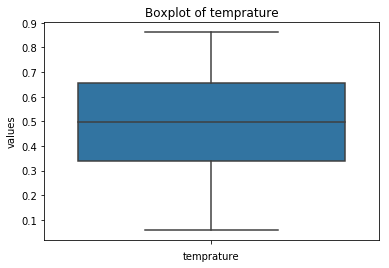

atemp


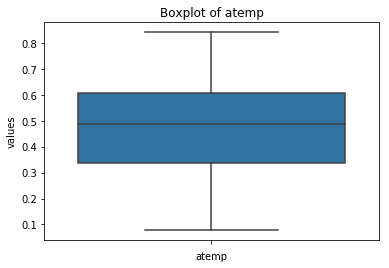

humidity


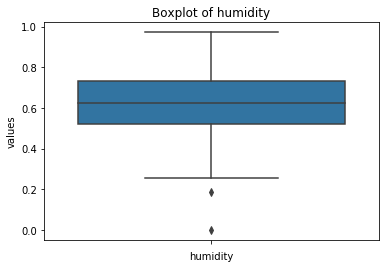

windspeed


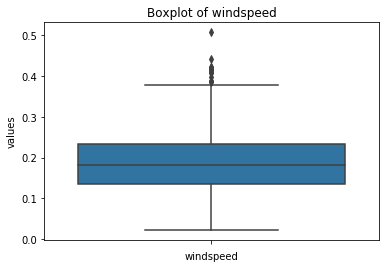

count


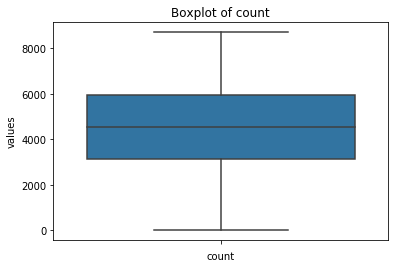

In [12]:
##Plot boxplot to visulazie outliers-
for i in cnames:
    print(i)
    sns.boxplot(y=data[i])
    plt.xlabel(i)
    plt.ylabel("values")
    plt.title("Boxplot of "+i)
    plt.show()

from boxplot it is clear that two variables humidity and windspeed having outliers.

In [13]:
#calculate iqr, lower fence and upper fence-
for i in cnames:
    print(i)
    q75,q25= np.percentile(data.loc[:,i],[75,25])
    iqr= q75-q25
    minimum= q25-(iqr*1.5)
    maximum= q75+(iqr*1.5)
    print("min= "+str(minimum))
    print("max= "+str(maximum))
    print("IQR= "+str(iqr))
    
#replace outliers with NA-
    data.loc[data[i]<minimum,i]=np.nan
    data.loc[data[i]>maximum,i]=np.nan    

temprature
min= -0.14041600000000015
max= 1.1329160000000003
IQR= 0.3183330000000001
atemp
min= -0.06829675000000018
max= 1.0147412500000002
IQR= 0.2707595000000001
humidity
min= 0.20468725
max= 1.0455212500000002
IQR= 0.21020850000000002
windspeed
min= -0.012446750000000034
max= 0.38061125
IQR= 0.0982645
count
min= -1054.0
max= 10162.0
IQR= 2804.0


In [14]:
#impute NA with median-
data['humidity']=data['humidity'].fillna(data['humidity'].median())
data['windspeed']=data['windspeed'].fillna(data['windspeed'].median())

#check NA in data-
print(data.isnull().sum())

season        0
year          0
month         0
holiday       0
weekday       0
workingday    0
weather       0
temprature    0
atemp         0
humidity      0
windspeed     0
count         0
dtype: int64


# Data Understanding-

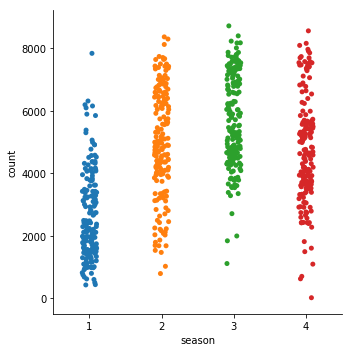

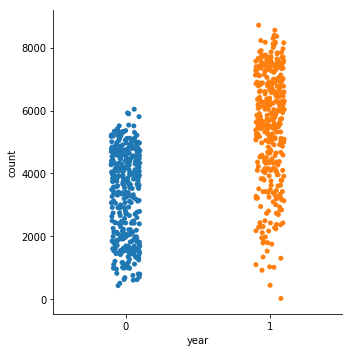

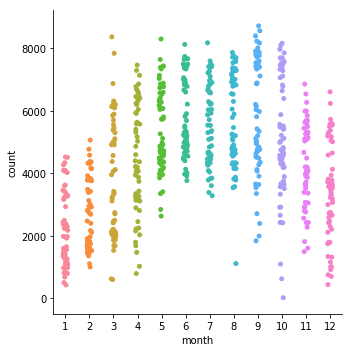

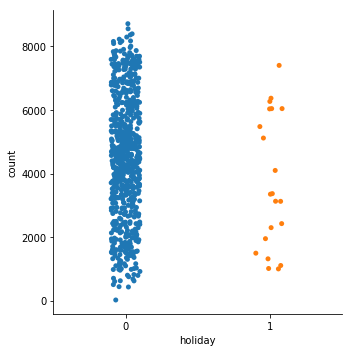

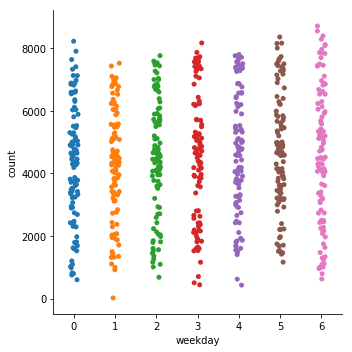

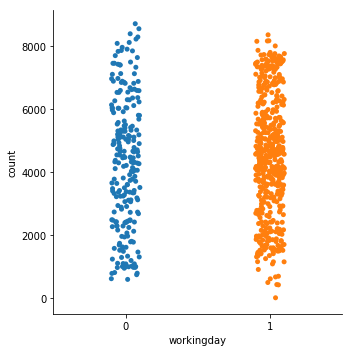

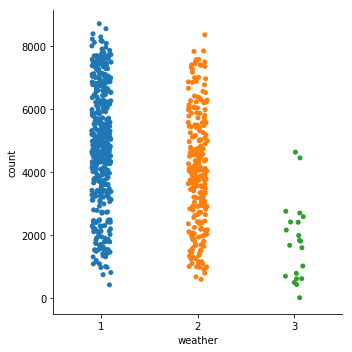

In [15]:
for i in cat_cnames:
    sns.catplot(x=i,y="count",data=data)
    fname = str(i)+'.pdf'
    plt.savefig(fname) 

*From Fisrt plot we can see that season 2,3 and 4 have more bike count as comapre to season 1. the daily bike count for these season was between 4000 to 8000.
*From year plot we can see that bike count is increased in 2012 as compared to 2011.
*From month plot we can see the bike count maximum between 4 to 10 month.
*From holiday the bike count is maximum as comapre to non holiday.
*Bike count is maximum for day 0,5 and 6 as per weekday varaible.
*FOr weather 1 the count of bike is maximum, after that for weather 2.



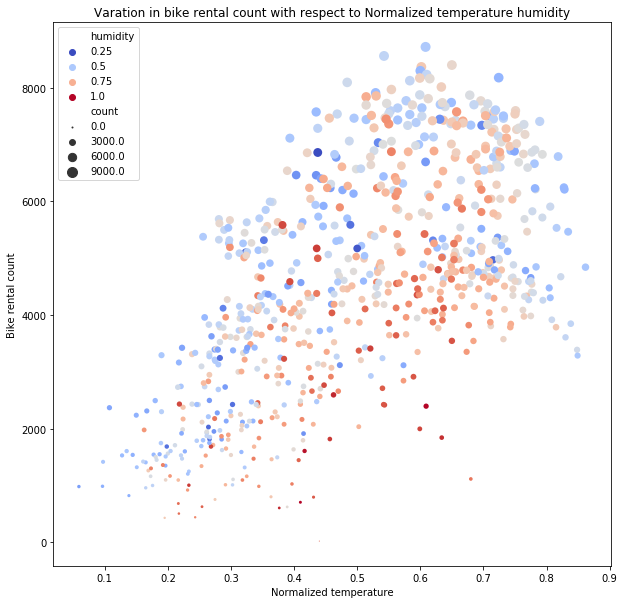

In [16]:
f, ax = plt.subplots(figsize=(10, 10))
sns.scatterplot(x="temprature", y="count",
                hue="humidity", size="count",
                palette="coolwarm",sizes=(1, 100), linewidth=0,
                data=data,ax=ax)
plt.title("Varation in bike rental count with respect to Normalized temperature humidity")
plt.ylabel("Bike rental count")
plt.xlabel("Normalized temperature")
plt.savefig('bike_temp&humidity_plot.pdf')

*From the plot we can see that count is maximum when temprature 0.4 to 0.7 and humidity below 0.75.

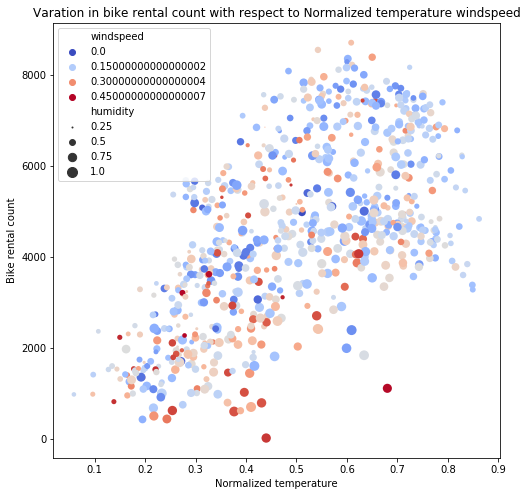

In [17]:
f, ax = plt.subplots(figsize=(8, 8))
sns.scatterplot(x="temprature", y="count",
                hue="windspeed", size="humidity",
                palette="coolwarm",sizes=(1, 100), linewidth=0,
                data=data,ax=ax)
plt.title("Varation in bike rental count with respect to Normalized temperature windspeed")
plt.ylabel("Bike rental count")
plt.xlabel("Normalized temperature")
plt.savefig('bike_temp&windspeed_plot.pdf')

*From the above plot we can see bike count is maximum between temp 0.5 to 0.7, windspped below 0.15 and humidity less than 0.75

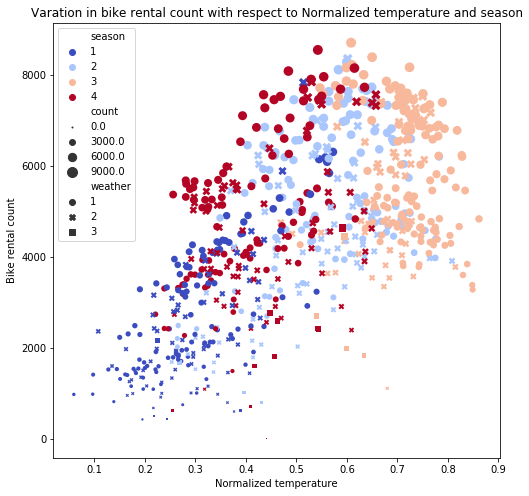

In [18]:
f, ax = plt.subplots(figsize=(8, 8))
sns.scatterplot(x="temprature", y="count",
                hue="season", size="count",style= "weather",
                palette="coolwarm",sizes=(1, 100), linewidth=0,
                data=data,ax=ax)
plt.title("Varation in bike rental count with respect to Normalized temperature and season")
plt.ylabel("Bike rental count")
plt.xlabel("Normalized temperature")
plt.savefig('bike_temp&season_plot.pdf')

*From figure it is clear that maximum bike count is for season 2 and 3, when the temp between 0.5 to 0.7, and weather was 1 and 2

# Feature Selection-

In [19]:
#correlation analysis for numeric varialles-

#extract only numeric variables in dataframe for correlation-
df_corr= data.loc[:,cnames]

#generate correlation matrix-
corr_matrix= df_corr.corr()
(print(corr_matrix))

            temprature     atemp  humidity  windspeed     count
temprature    1.000000  0.991702  0.123723  -0.138937  0.627494
atemp         0.991702  1.000000  0.137312  -0.164157  0.631066
humidity      0.123723  0.137312  1.000000  -0.200237 -0.121454
windspeed    -0.138937 -0.164157 -0.200237   1.000000 -0.215203
count         0.627494  0.631066 -0.121454  -0.215203  1.000000


Text(0.5,1,'Correlation Plot')

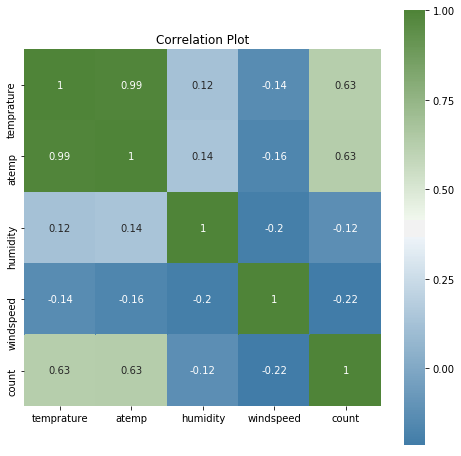

In [20]:
#correlation plot-
f,ax= plt.subplots(figsize=(8,8))

#plot-
sns.heatmap(corr_matrix,mask=np.zeros_like(corr_matrix,dtype=np.bool),cmap=sns.diverging_palette(240,120,as_cmap=True),
           square=True,ax=ax,annot=True)
plt.title("Correlation Plot")

From correlation plot we can see temprature and atemp are highly correlated, so we can remove atemp variable under dimension redution.

In [21]:
#Anova test for categorical predictor and numeric target variable-
import statsmodels.api as sm
from statsmodels.formula.api import ols

label = 'count'
for  i in cat_cnames:
    frame = label + ' ~ ' + i
    model = ols(frame,data=data).fit()
    anova = sm.stats.anova_lm(model, typ=2)
    print(anova)  

                sum_sq     df           F        PR(>F)
season    4.517974e+08    1.0  143.967653  2.133997e-30
Residual  2.287738e+09  729.0         NaN           NaN
                sum_sq     df           F        PR(>F)
year      8.798289e+08    1.0  344.890586  2.483540e-63
Residual  1.859706e+09  729.0         NaN           NaN
                sum_sq     df          F        PR(>F)
month     2.147445e+08    1.0  62.004625  1.243112e-14
Residual  2.524791e+09  729.0        NaN           NaN
                sum_sq     df         F    PR(>F)
holiday   1.279749e+07    1.0  3.421441  0.064759
Residual  2.726738e+09  729.0       NaN       NaN
                sum_sq     df         F    PR(>F)
weekday   1.246109e+07    1.0  3.331091  0.068391
Residual  2.727074e+09  729.0       NaN       NaN
                  sum_sq     df         F    PR(>F)
workingday  1.024604e+07    1.0  2.736742  0.098495
Residual    2.729289e+09  729.0       NaN       NaN
                sum_sq     df          F   

From anova test we can see varaibles- holiday,weekday,and workingday have pr>0.05, so we can drop them in dimension reduction.

In [22]:
#Dimension Reduction-
data= data.drop(["atemp","holiday","weekday","workingday"],axis=1)

print(data.shape)

(731, 8)


In [23]:
data.head()

,season,year,month,weather,temprature,humidity,windspeed,count
0,1,0,1,2,0.344167,0.805833,0.160446,985.0
1,1,0,1,2,0.363478,0.696087,0.248539,801.0
2,1,0,1,1,0.196364,0.437273,0.248309,1349.0
3,1,0,1,1,0.200000,0.590435,0.160296,1562.0
4,1,0,1,1,0.226957,0.436957,0.186900,1600.0


In [24]:
#update numeric and categorical variable after dimension reduction-

#continuous variable-
cnames= ['temprature','humidity', 'windspeed', 'count']

#categorical variables-
cat_cnames=['season', 'year', 'month','weather']

# Feature Scaling-

temprature


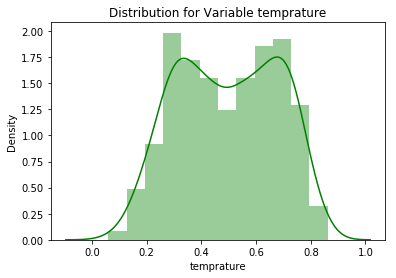

humidity


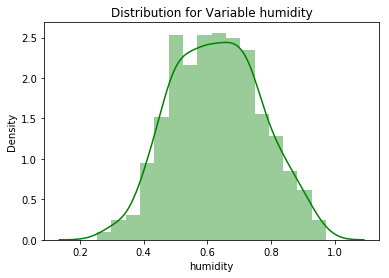

windspeed


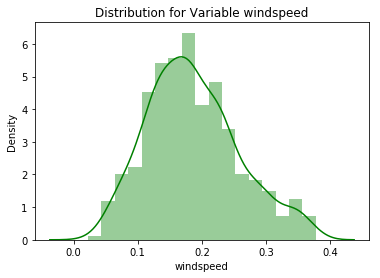

count


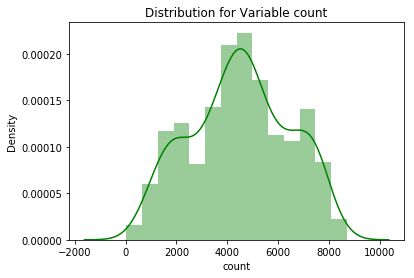

In [25]:
#distribution check to check data is uniformly distributed or not-

for i in cnames:
    print(i)
    sns.distplot(data[i],bins='auto',color='green')
    plt.title("Distribution for Variable "+i)
    plt.ylabel("Density")
    plt.show()

from distribution plot it is clear that data is already normalized.

In [26]:
data.describe()

,season,year,month,weather,temprature,humidity,windspeed,count
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2.496580,0.500684,6.519836,1.395349,0.495385,0.629354,0.186257,4504.348837
std,1.110807,0.500342,3.451913,0.544894,0.183051,0.139566,0.071156,1937.211452
min,1.000000,0.000000,1.000000,1.000000,0.059130,0.254167,0.022392,22.000000
25%,2.000000,0.000000,4.000000,1.000000,0.337083,0.522291,0.134950,3152.000000
50%,3.000000,1.000000,7.000000,1.000000,0.498333,0.627500,0.178802,4548.000000
75%,3.000000,1.000000,10.000000,2.000000,0.655417,0.730209,0.229786,5956.000000
max,4.000000,1.000000,12.000000,3.000000,0.861667,0.972500,0.378108,8714.000000


Here, we can see data all numeric varaibles are already normalized, so we do not need to scale them.

# Machine Learning Model Devlopment-

# Train-Test Split-

In [151]:
#df=data
data=df

In [152]:
#create categorical variables to dummy variables-
data= pd.get_dummies(data,columns=cat_cnames)

data.shape

(731, 25)

In [98]:
data.head()

,temprature,humidity,windspeed,count,season_1,season_2,season_3,season_4,year_0,year_1,...,month_6,month_7,month_8,month_9,month_10,month_11,month_12,weather_1,weather_2,weather_3
0,0.344167,0.805833,0.160446,985.0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,0.363478,0.696087,0.248539,801.0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,0.196364,0.437273,0.248309,1349.0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0.200000,0.590435,0.160296,1562.0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0.226957,0.436957,0.186900,1600.0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [99]:
#Import libraries-
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import train_test_split 
from sklearn.metrics import mean_squared_error

In [153]:
#Error metrics function-
def MAPE(y_true,y_prediction):
    mape= np.mean(np.abs(y_true-y_prediction)/y_true)*100
    return mape

In [154]:
#split data for predictor and target seperatly-
X= data.drop(['count'],axis=1)
y= data['count']

In [155]:
#divide data into train and test part-
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=.20,random_state=0)

# Decision Tree Model-

In [156]:
#import libraries-
from sklearn.tree import DecisionTreeRegressor

#Decision tree for regression-
DT_model= DecisionTreeRegressor(max_depth=2).fit(X_train,y_train)

#Model prediction on train data-
DT_train= DT_model.predict(X_train)

#Model prediction on test data-
DT_test= DT_model.predict(X_test)

#Model performance on train data-
MAPE_train= MAPE(y_train,DT_train)

#Model performance on test data-
MAPE_test= MAPE(y_test,DT_test)

#r2 value for train data-
r2_train= r2_score(y_train,DT_train)

#r2 value for test data-
r2_test=r2_score(y_test,DT_test)

print("Mean Absolute Precentage Error for train data="+str(MAPE_train))
print("Mean Absolute Precentage Error for test data="+str(MAPE_test))
print("R^2_score for train data="+str(r2_train))
print("R^2_score for test data="+str(r2_test))

Mean Absolute Precentage Error for train data=62.26013293672567
Mean Absolute Precentage Error for test data=36.94809301452646
R^2_score for train data=0.6775629218593628
R^2_score for test data=0.6464697716428666


In [157]:
df1= {'Model Name': ['Decision Tree'],'MAPE_Train':[MAPE_train],'MAPE_Test':[MAPE_test],'R-squared_Train':[r2_train],
      'R-squared_Test':[r2_test]}
result1= pd.DataFrame(df1)

# Random Search CV in Decision Tree-

In [159]:
#import libraries-
from sklearn.model_selection import RandomizedSearchCV

RandomDecisionTree = DecisionTreeRegressor(random_state = 0)
depth = list(range(1,20,2))
random_search = {'max_depth': depth}

#Random Decision Tree model-
RDT_model= RandomizedSearchCV(RandomDecisionTree,param_distributions= random_search,n_iter=5,cv=5)
RDT_model= RDT_model.fit(X_train,y_train)

#Best parameters for model-
best_parameters = RDT_model.best_params_

#Best model-
best_model = RDT_model.best_estimator_

#Model prediction on train data-
RDT_train = best_model.predict(X_train)

#Model prediction on test data-
RDT_test = best_model.predict(X_test)

#Model performance on train data-
MAPE_train= MAPE(y_train,RDT_train)

#Model performance on test data-
MAPE_test= MAPE(y_test,RDT_test)

#r2 value for train data-
r2_train= r2_score(y_train,RDT_train)

#r2 value for test data-
r2_test=r2_score(y_test,RDT_test)

print("Best Parameter="+str(best_parameters))
print("Best Model="+str(best_model))
print("Mean Absolute Precentage Error for train data="+str(MAPE_train))
print("Mean Absolute Precentage Error for test data="+str(MAPE_test))
print("R^2_score for train data="+str(r2_train))
print("R^2_score for test data="+str(r2_test))

Best Parameter={'max_depth': 5}
Best Model=DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')
Mean Absolute Precentage Error for train data=14.180789128346541
Mean Absolute Precentage Error for test data=23.419815797374792
R^2_score for train data=0.8744351993110204
R^2_score for test data=0.8093605658476156


In [160]:
df2= {'Model Name': ['Decision Tree Random Search CV'],'MAPE_Train':[MAPE_train],'MAPE_Test':[MAPE_test],'R-squared_Train':[r2_train],
      'R-squared_Test':[r2_test]}
result2= pd.DataFrame(df2)

In [161]:
result= result1.append(result2)

# Grid Search CV in Decision Tree-

In [162]:
#import libraries-
from sklearn.model_selection import GridSearchCV

GridDecisionTree= DecisionTreeRegressor(random_state=0)
depth= list(range(1,20,2))
grid_search= {'max_depth':depth}

#Grid Decision Tree model-
GDT_model= GridSearchCV(GridDecisionTree,param_grid=grid_search,cv=5)
GDT_model= GDT_model.fit(X_train,y_train)

#Best parameters for model-
best_parameters = GDT_model.best_params_

#Best model-
best_model = GDT_model.best_estimator_

#Model prediction on train data-
GDT_train = best_model.predict(X_train)

#Model prediction on test data-
GDT_test = best_model.predict(X_test)

#Model performance on train data-
MAPE_train= MAPE(y_train,GDT_train)

#Model performance on test data-
MAPE_test= MAPE(y_test,GDT_test)

#r2 value for train data-
r2_train= r2_score(y_train,GDT_train)

#r2 value for test data-
r2_test=r2_score(y_test,GDT_test)

print("Best Parameter="+str(best_parameters))
print("Best Model="+str(best_model))
print("Mean Absolute Precentage Error for train data="+str(MAPE_train))
print("Mean Absolute Precentage Error for test data="+str(MAPE_test))
print("R^2_score for train data="+str(r2_train))
print("R^2_score for test data="+str(r2_test))


Best Parameter={'max_depth': 5}
Best Model=DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')
Mean Absolute Precentage Error for train data=14.180789128346541
Mean Absolute Precentage Error for test data=23.419815797374792
R^2_score for train data=0.8744351993110204
R^2_score for test data=0.8093605658476156


In [163]:
df3= {'Model Name': ['Decision Tree Grid Search CV'],'MAPE_Train':[MAPE_train],'MAPE_Test':[MAPE_test],'R-squared_Train':[r2_train],
      'R-squared_Test':[r2_test]}
result3= pd.DataFrame(df3)

In [164]:
result= result.append(result3)

# Random Forest Model-

In [165]:
#import libraris-
from sklearn.ensemble import RandomForestRegressor

#Random Forest for regression-
RF_model= RandomForestRegressor(n_estimators=100).fit(X_train,y_train)

#model prediction on train data-
RF_train= RF_model.predict(X_train)

#model prediction on test data-
RF_test= RF_model.predict(X_test)

#Model performance on train data-
MAPE_train= MAPE(y_train,RF_train)

#Model performance on test data-
MAPE_test= MAPE(y_test,RF_test)

#r2 value for train data-
r2_train= r2_score(y_train,RF_train)

#r2 value for test data-
r2_test=r2_score(y_test,RF_test)

print("Mean Absolute Precentage Error for train data="+str(MAPE_train))
print("Mean Absolute Precentage Error for test data="+str(MAPE_test))
print("R^2_score for train data="+str(r2_train))
print("R^2_score for test data="+str(r2_test))

Mean Absolute Precentage Error for train data=16.77699690960825
Mean Absolute Precentage Error for test data=20.42606722935694
R^2_score for train data=0.9791775521875736
R^2_score for test data=0.8818011050780997


In [166]:
df4= {'Model Name': ['Random Forest'],'MAPE_Train':[MAPE_train],'MAPE_Test':[MAPE_test],'R-squared_Train':[r2_train],
      'R-squared_Test':[r2_test]}
result4= pd.DataFrame(df4)

In [167]:
result= result.append(result4)

# Random Search CV in Random Forest-

In [168]:
#import libraries-
from sklearn.model_selection import RandomizedSearchCV

RandomRandomForest = RandomForestRegressor(random_state = 0)
n_estimator = list(range(1,100,2))
depth = list(range(1,20,2))
random_search = {'n_estimators':n_estimator, 'max_depth': depth}

#Random Random Forest model-
RRF_model= RandomizedSearchCV(RandomRandomForest,param_distributions= random_search,n_iter=5,cv=5)
RRF_model= RRF_model.fit(X_train,y_train)

#Best parameters for model-
best_parameters = RRF_model.best_params_

#Best model-
best_model = RRF_model.best_estimator_

#Model prediction on train data-
RRF_train = best_model.predict(X_train)

#Model prediction on test data-
RRF_test = best_model.predict(X_test)

#Model performance on train data-
MAPE_train= MAPE(y_train,RRF_train)

#Model performance on test data-
MAPE_test= MAPE(y_test,RRF_test)

#r2 value for train data-
r2_train= r2_score(y_train,RRF_train)

#r2 value for test data-
r2_test=r2_score(y_test,RRF_test)

print("Best Parameter="+str(best_parameters))
print("Best Model="+str(best_model))
print("Mean Absolute Precentage Error for train data="+str(MAPE_train))
print("Mean Absolute Precentage Error for test data="+str(MAPE_test))
print("R^2_score for train data="+str(r2_train))
print("R^2_score for test data="+str(r2_test))

Best Parameter={'n_estimators': 81, 'max_depth': 15}
Best Model=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=81, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)
Mean Absolute Precentage Error for train data=21.445350458942634
Mean Absolute Precentage Error for test data=21.02935544953941
R^2_score for train data=0.9782192685232404
R^2_score for test data=0.8789293277536785


In [170]:
df5= {'Model Name': ['Random Forest Random Search CV'],'MAPE_Train':[MAPE_train],'MAPE_Test':[MAPE_test],'R-squared_Train':[r2_train],
      'R-squared_Test':[r2_test]}
result5= pd.DataFrame(df5)

In [171]:
result= result.append(result5)

# Grid Search CV in Random Forest-

In [172]:
#import libraries-
from sklearn.model_selection import GridSearchCV

GridRandomForest= RandomForestRegressor(random_state=0)
n_estimator = list(range(1,20,2))
depth= list(range(1,20,2))
grid_search= {'n_estimators':n_estimator, 'max_depth': depth}

#Grid Random Forest model-
GRF_model= GridSearchCV(GridRandomForest,param_grid=grid_search,cv=5)
GRF_model= GRF_model.fit(X_train,y_train)

#Best parameters for model-
best_parameters = GRF_model.best_params_

#Best model-
best_model = GRF_model.best_estimator_

#Model prediction on train data-
GRF_train = best_model.predict(X_train)

#Model prediction on test data-
GRF_test = best_model.predict(X_test)

#Model performance on train data-
MAPE_train= MAPE(y_train,GRF_train)

#Model performance on test data-
MAPE_test= MAPE(y_test,GRF_test)

#r2 value for train data-
r2_train= r2_score(y_train,GRF_train)

#r2 value for test data-
r2_test=r2_score(y_test,GRF_test)

print("Best Parameter="+str(best_parameters))
print("Best Model="+str(best_model))
print("Mean Absolute Precentage Error for train data="+str(MAPE_train))
print("Mean Absolute Precentage Error for test data="+str(MAPE_test))
print("R^2_score for train data="+str(r2_train))
print("R^2_score for test data="+str(r2_test))

Best Parameter={'max_depth': 9, 'n_estimators': 17}
Best Model=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=17, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)
Mean Absolute Precentage Error for train data=21.320741945462775
Mean Absolute Precentage Error for test data=20.567325463456854
R^2_score for train data=0.9648262675118173
R^2_score for test data=0.8753352940976121


In [173]:
df6= {'Model Name': ['Random Forest Grid Search CV'],'MAPE_Train':[MAPE_train],'MAPE_Test':[MAPE_test],'R-squared_Train':[r2_train],
      'R-squared_Test':[r2_test]}
result6= pd.DataFrame(df6)

In [174]:
result= result.append(result6)

# Linear Regression Model-

In [175]:
#import libraries-
import statsmodels.api as sm

#Linear Regression model for regression-
LR_model= sm.OLS(y_train,X_train).fit()
print(LR_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     140.2
Date:                Sat, 06 Apr 2019   Prob (F-statistic):          1.63e-203
Time:                        17:25:53   Log-Likelihood:                -4716.2
No. Observations:                 584   AIC:                             9474.
Df Residuals:                     563   BIC:                             9566.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
temprature  4807.6605    477.418     10.070      0.0

In [176]:
#model prediction on train data-
LR_train= LR_model.predict(X_train)

#model prediction on test data-
LR_test= LR_model.predict(X_test)

#Model performance on train data-
MAPE_train= MAPE(y_train,LR_train)

#Model performance on test data-
MAPE_test= MAPE(y_test,LR_test)

#r2 value for train data-
r2_train= r2_score(y_train,LR_train)

#r2 value for test data-
r2_test=r2_score(y_test,LR_test)

print("Mean Absolute Precentage Error for train data="+str(MAPE_train))
print("Mean Absolute Precentage Error for test data="+str(MAPE_test))
print("R^2_score for train data="+str(r2_train))
print("R^2_score for test data="+str(r2_test))

Mean Absolute Precentage Error for train data=44.444512312552895
Mean Absolute Precentage Error for test data=18.800696038206944
R^2_score for train data=0.8327600660988469
R^2_score for test data=0.8411102698142885


In [177]:
df7= {'Model Name': ['Linear Regression'],'MAPE_Train':[MAPE_train],'MAPE_Test':[MAPE_test],'R-squared_Train':[r2_train],
      'R-squared_Test':[r2_test]}
result7= pd.DataFrame(df7)

In [178]:
result= result.append(result7)

# Gradient Boosting Model-

In [179]:
#import libraries-
from sklearn.ensemble import GradientBoostingRegressor

#Gradient Boosting for regression-
GB_model = GradientBoostingRegressor().fit(X_train, y_train)

#model prediction on train data-
GB_train= GB_model.predict(X_train)

#model prediction on test data-
GB_test= GB_model.predict(X_test)

#Model performance on train data-
MAPE_test= MAPE(y_train,GB_train)

#Model performance on test data-
MAPE_test= MAPE(y_test,GB_test)

#r2 value for train data-
r2_train= r2_score(y_train,GB_train)

#r2 value for test data-
r2_test=r2_score(y_test,GB_test)

print("Mean Absolute Precentage Error for train data="+str(MAPE_train))
print("Mean Absolute Precentage Error for test data="+str(MAPE_test))
print("R^2_score for train data="+str(r2_train))
print("R^2_score for test data="+str(r2_test))


Mean Absolute Precentage Error for train data=44.444512312552895
Mean Absolute Precentage Error for test data=19.899340749272547
R^2_score for train data=0.9453851786306906
R^2_score for test data=0.8645945042011559


In [180]:
df8= {'Model Name': ['Gradient Boosting'],'MAPE_Train':[MAPE_train],'MAPE_Test':[MAPE_test],'R-squared_Train':[r2_train],
      'R-squared_Test':[r2_test]}
result8= pd.DataFrame(df8)

In [181]:
result= result.append(result8)

# Random Search CV in Gradient Boosting-

In [182]:
#import libraries-
from sklearn.model_selection import RandomizedSearchCV

RandomGradientBoosting = GradientBoostingRegressor(random_state = 0)
n_estimator = list(range(1,100,2))
depth = list(range(1,20,2))
random_search = {'n_estimators':n_estimator, 'max_depth': depth}

#Random Gradient Boosting model-
RGB_model= RandomizedSearchCV(RandomGradientBoosting,param_distributions= random_search,n_iter=5,cv=5)
RGB_model= RGB_model.fit(X_train,y_train)

#Best parameters for model-
best_parameters = RGB_model.best_params_

#Best model-
best_model = RGB_model.best_estimator_

#Model prediction on train data-
RGB_train = best_model.predict(X_train)

#Model prediction on test data-
RGB_test = best_model.predict(X_test)

#Model performance on train data-
MAPE_train= MAPE(y_train,RGB_train)

#Model performance on test data-
MAPE_test= MAPE(y_test,RGB_test)

#r2 value for train data-
r2_train= r2_score(y_train,RGB_train)

#r2 value for test data-
r2_test=r2_score(y_test,RGB_test)

print("Best Parameter="+str(best_parameters))
print("Best Model="+str(best_model))
print("Mean Absolute Precentage Error for train data="+str(MAPE_train))
print("Mean Absolute Precentage Error for test data="+str(MAPE_test))
print("R^2_score for train data="+str(r2_train))
print("R^2_score for test data="+str(r2_test))

Best Parameter={'n_estimators': 73, 'max_depth': 7}
Best Model=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=7, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=73, presort='auto', random_state=0,
             subsample=1.0, verbose=0, warm_start=False)
Mean Absolute Precentage Error for train data=1.732620030029962
Mean Absolute Precentage Error for test data=21.73009586735038
R^2_score for train data=0.9982358399869793
R^2_score for test data=0.8665491553293638


In [183]:
df9= {'Model Name': ['Gradient Boosting Random Search CV'],'MAPE_Train':[MAPE_train],'MAPE_Test':[MAPE_test],
      'R-squared_Train':[r2_train],'R-squared_Test':[r2_test]}
result9= pd.DataFrame(df9)

In [184]:
result= result.append(result9)

# Grid Search CV in Gradient Boosting-

In [185]:
#import libraries-
from sklearn.model_selection import GridSearchCV

GridGradientBoosting= GradientBoostingRegressor(random_state=0)
n_estimator = list(range(1,20,2))
depth= list(range(1,20,2))
grid_search= {'n_estimators':n_estimator, 'max_depth': depth}

#Grid Random Forest model-
GGB_model= GridSearchCV(GridGradientBoosting,param_grid=grid_search,cv=5)
GGB_model= GGB_model.fit(X_train,y_train)

#Best parameters for model-
best_parameters = GGB_model.best_params_

#Best model-
best_model = GGB_model.best_estimator_

#Model prediction on train data-
GGB_train = best_model.predict(X_train)

#Model prediction on test data-
GGB_test = best_model.predict(X_test)

#Model performance on train data-
MAPE_train= MAPE(y_train,GGB_train)

#Model performance on test data-
MAPE_test= MAPE(y_test,GGB_test)

#r2 value for train data-
r2_train= r2_score(y_train,GGB_train)

#r2 value for test data-
r2_test=r2_score(y_test,GGB_test)

print("Best Parameter="+str(best_parameters))
print("Best Model="+str(best_model))
print("Mean Absolute Precentage Error for train data="+str(MAPE_train))
print("Mean Absolute Precentage Error for test data="+str(MAPE_test))
print("R^2_score for train data="+str(r2_train))
print("R^2_score for test data="+str(r2_test))

Best Parameter={'max_depth': 5, 'n_estimators': 19}
Best Model=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=5, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=19, presort='auto', random_state=0,
             subsample=1.0, verbose=0, warm_start=False)
Mean Absolute Precentage Error for train data=18.833447720956062
Mean Absolute Precentage Error for test data=25.485646188467083
R^2_score for train data=0.9221138936676011
R^2_score for test data=0.8337462222690681


In [186]:
df10= {'Model Name': ['Gradient Boosting Grid Search CV'],'MAPE_Train':[MAPE_train],'MAPE_Test':[MAPE_test],
      'R-squared_Train':[r2_train],'R-squared_Test':[r2_test]}
result10= pd.DataFrame(df10)

In [187]:
result= result.append(result10)

In [188]:
result= result.reset_index(drop=True)

In [189]:
#Final result of all the model with MAPE and r-Squared-
result

,Model Name,MAPE_Train,MAPE_Test,R-squared_Train,R-squared_Test
0,Decision Tree,62.260133,36.948093,0.677563,0.646470
1,Decision Tree Random Search CV,14.180789,23.419816,0.874435,0.809361
2,Decision Tree Grid Search CV,14.180789,23.419816,0.874435,0.809361
3,Random Forest,16.776997,20.426067,0.979178,0.881801
4,Random Forest Random Search CV,21.445350,21.029355,0.978219,0.878929
5,Random Forest Grid Search CV,21.320742,20.567325,0.964826,0.875335
6,Linear Regression,44.444512,18.800696,0.832760,0.841110
7,Gradient Boosting,44.444512,19.899341,0.945385,0.864595
8,Gradient Boosting Random Search CV,1.732620,21.730096,0.998236,0.866549
9,Gradient Boosting Grid Search CV,18.833448,25.485646,0.922114,0.833746


# Thank You